In [112]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display

def read_jsonfile(json_file):
    with open(json_file) as json_file:
        json_data = json.load(json_file)
    return json_data

# 데이터 불러오기

In [2]:
path = './sample_dataset_1/'
bestshots = path + 'bestshots.json'
itemsets = path + 'itemsets.json'
category_info = 'sample_dataset_2/category_infos.json'
products_meta = 'sample_dataset_2/products_meta.json'

bestshots_json = read_jsonfile(bestshots)
itemsets_json = read_jsonfile(itemsets)
category_json = read_jsonfile(category_info)
products_json = read_jsonfile(products_meta)

category_ent1 = category_json['421B6D0E746C4E6D']
category_ent2 = category_json['B57D4F97C0E44A11']

bestshots_df = pd.read_json(bestshots)
itemsets_df = pd.read_json(itemsets)
category_en1_df = pd.DataFrame(category_ent1)
category_en2_df = pd.DataFrame(category_ent2)

In [3]:
itemsets_df.rename(columns={'enterpriseId':'enterprise_id', '_id':'id'}, inplace=True)
templates_df = pd.merge(bestshots_df, itemsets_df, on=['enterprise_id', 'projectId', 'id'])

ent2, ent1 = templates_df['enterprise_id'].unique().tolist()
ent1, ent2

('421B6D0E746C4E6D', 'B57D4F97C0E44A11')

### 스타일 별 아이템 목록 뽑기

In [4]:
def get_productId(items_list):
    new_list = []
    for item in items_list:
        new_list.append(item['productId'])
    return new_list

templates_df['items'] = templates_df['items'].apply(get_productId)

In [5]:
templates_df[['awesome_score', 'enterprise_id', 'top_style', 'items', 'style_predictions', 'projectId']]

awesome_score     enterprise_id     top_style  \
0        0.996600  B57D4F97C0E44A11        MODERN   
1        0.996008  B57D4F97C0E44A11       NATURAL   
2        0.995962  421B6D0E746C4E6D  SCANDINAVIAN   
3        0.995537  B57D4F97C0E44A11        MODERN   
4        0.995019  421B6D0E746C4E6D       NATURAL   
..            ...               ...           ...   
91       0.971838  B57D4F97C0E44A11       NATURAL   
92       0.971593  B57D4F97C0E44A11        MODERN   
93       0.971409  B57D4F97C0E44A11        MODERN   
94       0.971278  B57D4F97C0E44A11        MODERN   
95       0.971237  B57D4F97C0E44A11       NATURAL   

                                                items  \
0   [XXQODtk64AA2BC4BBE54FE6, XdhSsO0816AF21BBE9E4...   
1   [Xr78ibh6534B86500774C6F, XnWHmUB56BB0A7139B14...   
2   [X8brWeE6E8B43372F554FBC, X8bqVqW1FE8A93C42C14...   
3   [XX5gsD_A5E5F6B99A7B4DBB, XiG5Ajx8AF2879DD1054...   
4   [XoeB4_83FAEB81F0E364501, X6ZGM3j4A9B48A633DC4...   
..                                                ...   
91  [XfI7YQg8C1B6256738E4611, XYHqnoZ5E8D8E0235874...   
92  [XjDwfVdAF22EC90C17E41FC, XvJwdIRCA3E68A6895C4...   
93  [0381E1DE68C34DA7, XxzI_Yw1E906F3E4FC948CA, Xz...   
94  [9685F6318BD040E1, 034406C6064644E4, Xr78ibiD1...   
95  [XOaJWUT013866EB8251439C, XxzI_YKA15B6BA7F5494...   

                                    style_predictions                projectId  
0   {'BOHEMIAN': 6.833e-06, 'CLASSIC_AND_ANTIQUE':...  X8j99sp49E05B453ACF48AD  
1   {'BOHEMIAN': 0.0043363740000000005, 'CLASSIC_A...  X8W_69HBB9C8BD301A94CD9  
2   {'BOHEMIAN': 0.000171804, 'CLASSIC_AND_ANTIQUE...  X7hL3kEA3D67804817E43F6  
3   {'BOHEMIAN': 1.362e-06, 'CLASSIC_AND_ANTIQUE':...  X8nOJBP70A4670CF22F4BF6  
4   {'BOHEMIAN': 0.000137427, 'CLASSIC_AND_ANTIQUE...  X8p_jfR0B4C680157DA430F  
..                                                ...                      ...  
91  {'BOHEMIAN': 0.000598767, 'CLASSIC_AND_ANTIQUE...  X9BKMz6F4650C88C9C24E48  
92  {'BOHEMIAN': 6.0468000000000004e-05, 'CLASSIC_...  X8vZSLj052A7675D40E4EB4  
93  {'BOHEMIAN': 3.83e-07, 'CLASSIC_AND_ANTIQUE': ...  X8qEw1LA7EFF3CE415545A5  
94  {'BOHEMIAN': 0.00016347600000000002, 'CLASSIC_...  Xxie9vD3C123617746E47FA  
95  {'BOHEMIAN': 0.0009325720000000001, 'CLASSIC_A...  X8l3PVwAE3FDA3419D145D9  

[96 rows x 6 columns]

### 아이템 별 Top3 상위 스타일 뽑기

In [6]:
templates_df['top3_style'] = templates_df['style_predictions'].apply(lambda x: sorted([(name, score) for name, score in x.items()], key=lambda x: x[1], reverse=True)[:3])
templates_df['top3_style'] = templates_df['top3_style'].apply(lambda x: [name for name, score in x])

In [7]:
templates_df[['awesome_score', 'enterprise_id','items', 'top3_style', 'top_style', 'projectId']]

awesome_score     enterprise_id  \
0        0.996600  B57D4F97C0E44A11   
1        0.996008  B57D4F97C0E44A11   
2        0.995962  421B6D0E746C4E6D   
3        0.995537  B57D4F97C0E44A11   
4        0.995019  421B6D0E746C4E6D   
..            ...               ...   
91       0.971838  B57D4F97C0E44A11   
92       0.971593  B57D4F97C0E44A11   
93       0.971409  B57D4F97C0E44A11   
94       0.971278  B57D4F97C0E44A11   
95       0.971237  B57D4F97C0E44A11   

                                                items  \
0   [XXQODtk64AA2BC4BBE54FE6, XdhSsO0816AF21BBE9E4...   
1   [Xr78ibh6534B86500774C6F, XnWHmUB56BB0A7139B14...   
2   [X8brWeE6E8B43372F554FBC, X8bqVqW1FE8A93C42C14...   
3   [XX5gsD_A5E5F6B99A7B4DBB, XiG5Ajx8AF2879DD1054...   
4   [XoeB4_83FAEB81F0E364501, X6ZGM3j4A9B48A633DC4...   
..                                                ...   
91  [XfI7YQg8C1B6256738E4611, XYHqnoZ5E8D8E0235874...   
92  [XjDwfVdAF22EC90C17E41FC, XvJwdIRCA3E68A6895C4...   
93  [0381E1DE68C34DA7, XxzI_Yw1E906F3E4FC948CA, Xz...   
94  [9685F6318BD040E1, 034406C6064644E4, Xr78ibiD1...   
95  [XOaJWUT013866EB8251439C, XxzI_YKA15B6BA7F5494...   

                                     top3_style     top_style  \
0               [MODERN, MINIMAL, SCANDINAVIAN]        MODERN   
1        [NATURAL, MODERN, CLASSIC_AND_ANTIQUE]       NATURAL   
2   [SCANDINAVIAN, NATURAL, MID_CENTURY_MODERN]  SCANDINAVIAN   
3               [MODERN, SCANDINAVIAN, NATURAL]        MODERN   
4               [NATURAL, SCANDINAVIAN, MODERN]       NATURAL   
..                                          ...           ...   
91                   [NATURAL, LUXURY, MINIMAL]       NATURAL   
92        [MODERN, NATURAL, MID_CENTURY_MODERN]        MODERN   
93                    [MODERN, NATURAL, LUXURY]        MODERN   
94                   [MODERN, MINIMAL, NATURAL]        MODERN   
95              [NATURAL, SCANDINAVIAN, MODERN]       NATURAL   

                  projectId  
0   X8j99sp49E05B453ACF48AD  
1   X8W_69HBB9C8BD301A94CD9  
2   X7hL3kEA3D67804817E43F6  
3   X8nOJBP70A4670CF22F4BF6  
4   X8p_jfR0B4C680157DA430F  
..                      ...  
91  X9BKMz6F4650C88C9C24E48  
92  X8vZSLj052A7675D40E4EB4  
93  X8qEw1LA7EFF3CE415545A5  
94  Xxie9vD3C123617746E47FA  
95  X8l3PVwAE3FDA3419D145D9  

[96 rows x 6 columns]

In [8]:
items_stack = pd.DataFrame(templates_df['items'].apply(lambda x: pd.Series(x)).stack()).reset_index(1, drop=True)
items_stack

0
0   XXQODtk64AA2BC4BBE54FE6
0   XdhSsO0816AF21BBE9E4C25
0   XQKaHpw04D70BFBEB6F42EA
0          3100C835A1044D48
0          6E3531E25BF343BE
..                      ...
95  X1-HzCWC247E032E6754C6D
95  XkM8W9WDCCA3D3B46F3411A
95         6D721D1847F34015
95  XVUjXut5309C6E2F1704D0B
95  Xz-wAD-29DE9DB6CFC84E92

[1377 rows x 1 columns]

In [9]:
products_df = pd.merge(templates_df[['enterprise_id', 'top3_style', 'top_style', 'projectId', 'awesome_score']].reset_index(), items_stack.reset_index(), on='index').drop(['index'], axis=1).rename(columns = {0:'product_id'})
products_df

enterprise_id                       top3_style top_style  \
0     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
1     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
2     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
3     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
4     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
...                ...                              ...       ...   
1372  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1373  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1374  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1375  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1376  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   

                    projectId  awesome_score               product_id  
0     X8j99sp49E05B453ACF48AD       0.996600  XXQODtk64AA2BC4BBE54FE6  
1     X8j99sp49E05B453ACF48AD       0.996600  XdhSsO0816AF21BBE9E4C25  
2     X8j99sp49E05B453ACF48AD       0.996600  XQKaHpw04D70BFBEB6F42EA  
3     X8j99sp49E05B453ACF48AD       0.996600         3100C835A1044D48  
4     X8j99sp49E05B453ACF48AD       0.996600         6E3531E25BF343BE  
...                       ...            ...                      ...  
1372  X8l3PVwAE3FDA3419D145D9       0.971237  X1-HzCWC247E032E6754C6D  
1373  X8l3PVwAE3FDA3419D145D9       0.971237  XkM8W9WDCCA3D3B46F3411A  
1374  X8l3PVwAE3FDA3419D145D9       0.971237         6D721D1847F34015  
1375  X8l3PVwAE3FDA3419D145D9       0.971237  XVUjXut5309C6E2F1704D0B  
1376  X8l3PVwAE3FDA3419D145D9       0.971237  Xz-wAD-29DE9DB6CFC84E92  

[1377 rows x 6 columns]

### 아이템 별 태그 정보 병합하기

In [10]:
prod_tags_df = pd.DataFrame(products_json).T.reset_index(drop=True)[['_id', 'tags', 'name', 'images']]
prod_tags_df.head()

_id                                               tags  \
0  X5rPclT9CFB7E73DEA8495A                                                 []   
1  Xo7kQN3DC7A5B7C9FE746D6                     [헤이홈, hejhome, 조명, 라인등, 라인LED]   
2  XtxfYC1EF0F9090248B4518                      [데이드리머, daydreamer, 러그, 사각러그]   
3  XSWNaDQ8D34AB5317CA4971              [애플, Apple, 맥북, 노트북, 사무용, 사뭉제품, 가전제품]   
4  XT21RHb69DF906D42DF4284  [생활, 생활용품, 휴지통/분리수거함, 휴지통, 분리수거, 분리수거함, 쓰레기통, ...   

                  name                                             images  
0                4F_TV  [https://resources.archisketch.com/product/X5r...  
1  스마트 라인 LED (화이트)_on  [https://resources.archisketch.com/product/Xo7...  
2     브로 사계절 인테리어 러그 S  [https://resources.archisketch.com/product/Xtx...  
3             맥북프로 13형  [https://resources.archisketch.com/product/XSW...  
4  원터치 와이드 화이트 휴지통 10L  [https://resources.archisketch.com/product/XT2...

In [11]:
products_df = pd.merge(products_df, prod_tags_df, left_on='product_id', right_on='_id').drop(['_id'], axis=1)
products_df = pd.merge(products_df, products_df['product_id'].value_counts().reset_index(), left_on='product_id', right_on='index').rename(columns = {'product_id_x': 'product_id','product_id_y':'use_count'}).drop(['index'], axis=1)
products_df

enterprise_id                       top3_style top_style  \
0     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
1     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
2     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
3     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
4     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
...                ...                              ...       ...   
1372  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1373  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1374  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1375  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1376  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   

                    projectId  awesome_score               product_id  \
0     X8j99sp49E05B453ACF48AD       0.996600  XXQODtk64AA2BC4BBE54FE6   
1     X8j99sp49E05B453ACF48AD       0.996600  XdhSsO0816AF21BBE9E4C25   
2     X8j99sp49E05B453ACF48AD       0.996600  XQKaHpw04D70BFBEB6F42EA   
3     X8j99sp49E05B453ACF48AD       0.996600         3100C835A1044D48   
4     X8j99sp49E05B453ACF48AD       0.996600         6E3531E25BF343BE   
...                       ...            ...                      ...   
1372  X8l3PVwAE3FDA3419D145D9       0.971237         F41D77A7B85645BB   
1373  X8l3PVwAE3FDA3419D145D9       0.971237  XpB8ovXAD1DAF31931F4224   
1374  X8l3PVwAE3FDA3419D145D9       0.971237  XVFHdrDE3B85E8F0BDF4E50   
1375  X8l3PVwAE3FDA3419D145D9       0.971237         6D721D1847F34015   
1376  X8l3PVwAE3FDA3419D145D9       0.971237  XVUjXut5309C6E2F1704D0B   

                                                   tags  \
0              [계절가전, 가습기, 가습, 화이트, 흰색, 초음파식, 초음파, EMK]   
1     [소파, 쇼파, 1인용소파, 1인소파, 1인쇼파, 1인, 1인용, 1인용쇼파, 화이...   
2     [TV, 티비, 티브이, 텔레비전, 테레비, 블랙, 검정, 검은, 검은색, LED,...   
3                       [러그, 한일카페트, 터치미, 극세사, 원형, 아이보리]   
4                                                    []   
...                                                 ...   
1372                                                 []   
1373  [거울, 미러, 벽거울, 벽, 골드, 금색, 벽걸이형, 벽걸이, 벽걸이거울, 벽걸이...   
1374                                                 []   
1375                             [반려동물, 고양이, 반려묘, 브리스캣]   
1376                              [반려동물, 고양이, 반려묘, 딩동펫]   

                               name  \
0     자동습도조절 스마트 초음파 가습기 EK-H3C40WH   
1      마카롱 패브릭 1인용소파 5colors (아이보리)   
2          43인치 스마트TV PTI43UL (스탠드)   
3                터치미 극세사 원형 러그 아이보리   
4             투명 식물 액자 - 몬스테라 A3사이즈   
...                             ...   
1372                     레트로 플라워 커튼   
1373           뉴플로렌스 골드 스탠딩 거울 (골드)   
1374      특대형 아레카야자 이태리 토분 (화이트브라운)   
1375            O형 원목 캣타워 기본형 (그레이)   
1376        반려동물 고양이 스탠드 선인장 스크래쳐 M   

                                                 images  use_count  
0     [https://resources.archisketch.com/product/XXQ...          1  
1     [https://resources.archisketch.com/product/Xdh...          1  
2     [https://resources.archisketch.com/product/XQK...          1  
3     [https://resources.archisketch.com/product/310...          1  
4     [https://resources.archisketch.com/product/6E3...          1  
...                                                 ...        ...  
1372  [https://resources.archisketch.com/product/F41...          1  
1373  [https://resources.archisketch.com/product/XpB...          1  
1374  [https://resources.archisketch.com/product/XVF...          1  
1375  [https://resources.archisketch.com/product/6D7...          1  
1376  [https://resources.archisketch.com/product/XVU...          1  

[1377 rows x 10 columns]

In [12]:
# enterprise_id 별로 분류하기

products_df_4 = products_df[products_df['enterprise_id'] == ent1].reset_index(drop=True)
products_df_b = products_df[products_df['enterprise_id'] == ent2].reset_index(drop=True)
products_df_4.shape, products_df_b.shape

((188, 10), (1189, 10))

# Style 콘텐츠 유사도 측정

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
products_df_4['style_literal'] = products_df_4['top3_style'].apply(lambda x: ' '.join(x))
products_df_b['style_literal'] = products_df_b['top3_style'].apply(lambda x: ' '.join(x))

### 코사인 유사도를 통해 스타일 별 유사도 행렬 구하기

In [15]:
def get_style_matrix(df):
    count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))
    style_mat = count_vect.fit_transform(df['style_literal'])
    return style_mat

# 유사도가 높은 순으로 style_sim 비교 행 위치 인덱스 구하기
def get_sim_sorted_ind(df):
    mat = get_style_matrix(df)
    style_sim = cosine_similarity(mat, mat)
    style_sim_sorted_ind = style_sim.argsort()[:, ::-1]
    return style_sim_sorted_ind

In [16]:
style_sim_sorted_ind_4 = get_sim_sorted_ind(products_df_4)
style_sim_sorted_ind_b = get_sim_sorted_ind(products_df_b)

style_sim_sorted_ind_4.shape, style_sim_sorted_ind_b.shape

((188, 188), (1189, 1189))

### 스타일 콘텐츠 필터링을 이용한 상품 추천

In [168]:
def find_sim_item(df, sorted_ind, item_name, top_n=10):
    item_chosen = df[df['name'] == item_name]
    
    item_index = item_chosen.index.values
    similar_indices = sorted_ind[item_index, :(top_n*2)]
    similar_indices = similar_indices.reshape(-1)
    if similar_indices.ndim > 1:
        similar_indices = similar_indices.reshape(-1)
    
    # print(item_index)
    # print(similar_indices.shape, similar_indices)

    similar_indices = np.setdiff1d(similar_indices, item_index)

    # awesome_score 와 use_count 순서대로 높은 결과로 sorting
    cols = ['top_style', 'projectId', 'name', 'use_count', 'awesome_score', 'tags', 'images', 'product_id']
    recc_result = df.iloc[similar_indices].sort_values(by=['awesome_score', 'use_count'], ascending=False)[:top_n][cols]
    
    item_image_res = requests.get(df.iloc[item_index]['images'].tolist()[0][0])
    display(Image.open(BytesIO(item_image_res.content)))
    print(f'[{item_name}]에 대한 Top{top_n} 추천 결과')
    print('='*80)
    
    for i, (recc_image, recc_item) in enumerate(zip(recc_result['images'].tolist(), recc_result['name'].tolist())):
        try:
            res = requests.get(recc_image[0])
            img = Image.open(BytesIO(res.content))
            display(img)
        except IndexError:
            print('이미지가 없습니다!')
        
        print(f'{i+1}순위 추천 아이템 : {recc_item}')
        print('-'*60)
    print('='*80)
                                                
    return recc_result

### 'B57D4F97C0E44A11' 에 대한 추천 테스트

In [169]:
products_df_b['name'][:5]

0    자동습도조절 스마트 초음파 가습기 EK-H3C40WH
1     마카롱 패브릭 1인용소파 5colors (아이보리)
2         43인치 스마트TV PTI43UL (스탠드)
3               터치미 극세사 원형 러그 아이보리
4            투명 식물 액자 - 몬스테라 A3사이즈
Name: name, dtype: object

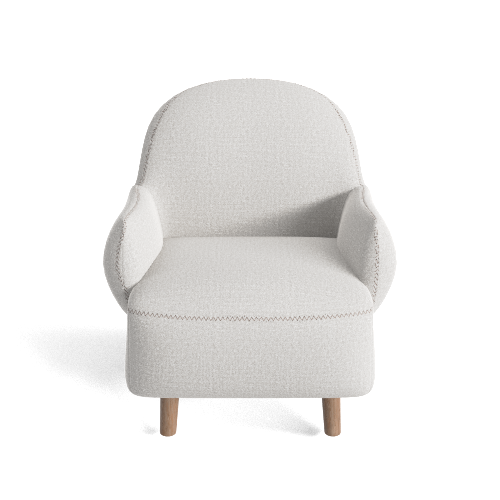

[마카롱 패브릭 1인용소파 5colors (아이보리)]에 대한 Top10 추천 결과


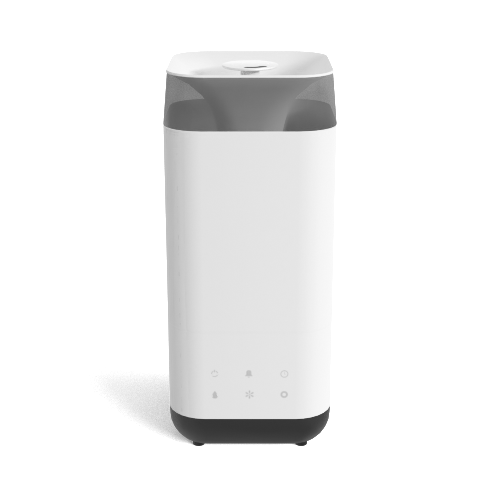

1순위 추천 아이템 : 자동습도조절 스마트 초음파 가습기 EK-H3C40WH
------------------------------------------------------------


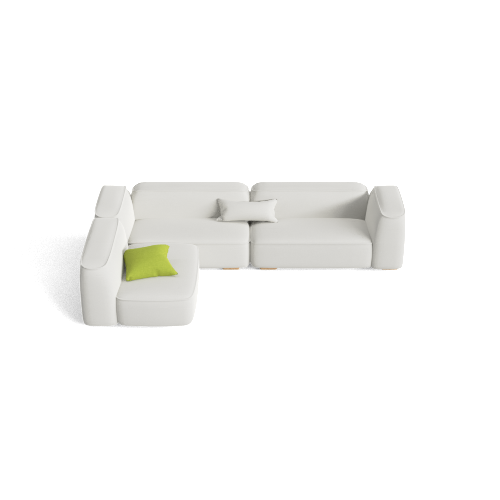

2순위 추천 아이템 : 미렌트 확장형 스타일클린 워셔블 패브릭소파 2colors(아이보리)
------------------------------------------------------------


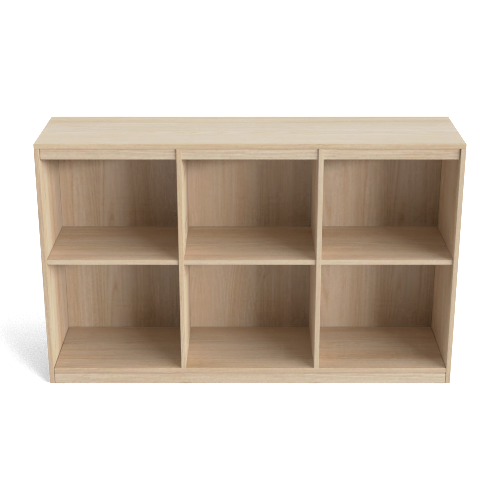

3순위 추천 아이템 : 샘키즈 낮은 책장 1305 (라이트메이플)
------------------------------------------------------------


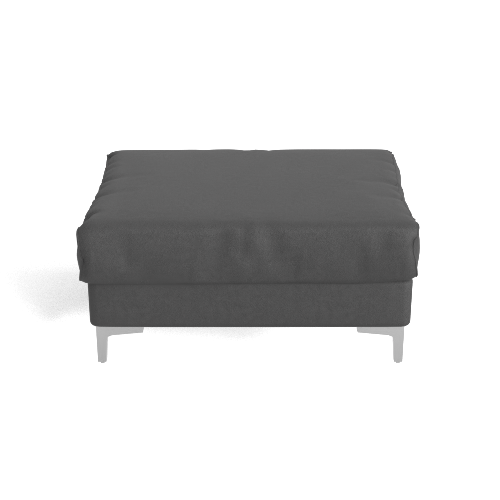

4순위 추천 아이템 : 그레이스 아쿠아텍스 소파 전용 보조스툴 단품 (다크그레이)
------------------------------------------------------------


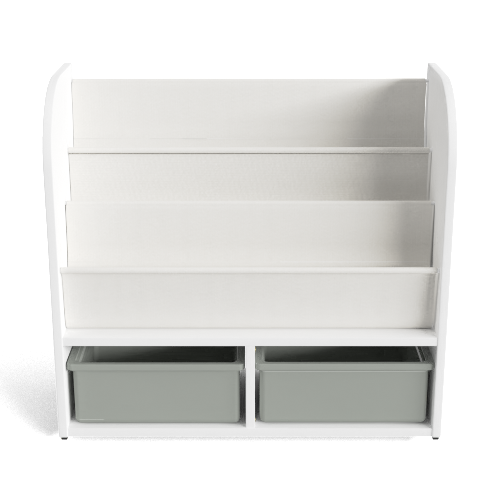

5순위 추천 아이템 : 샘키즈 스칸디 에디션 전면책장 870 (화이트)
------------------------------------------------------------


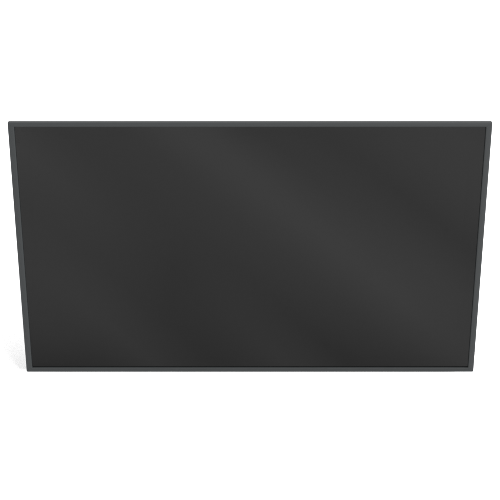

6순위 추천 아이템 : 65인치 4K UHD 사이니지 TV 본체형 / 벽걸이형 LH65QBREBGCXKR (블랙)
------------------------------------------------------------


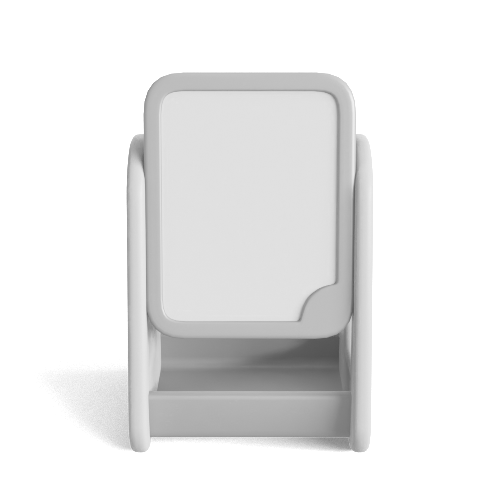

7순위 추천 아이템 : 이지두잉 유아 자석보드 칠판 (그레이)
------------------------------------------------------------


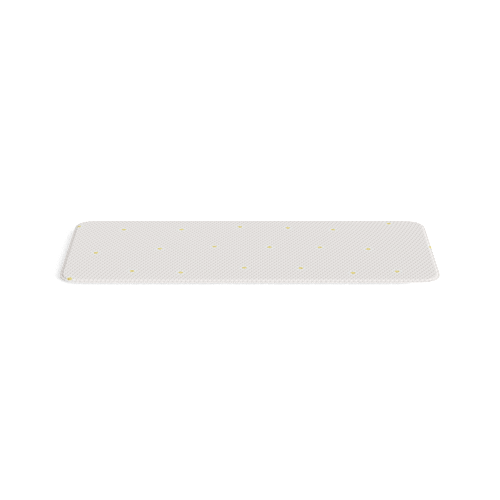

8순위 추천 아이템 : 스마일플라워 양면쿠션 주방매트(M)
------------------------------------------------------------


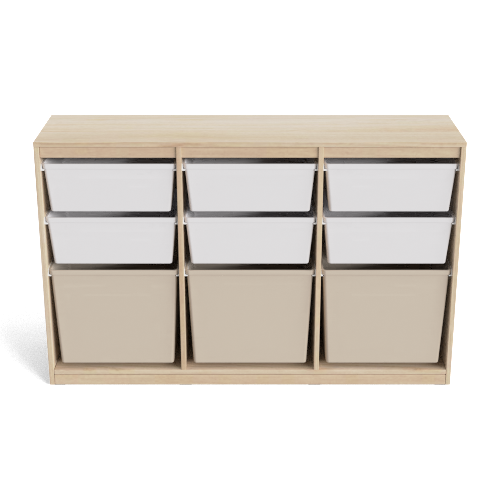

9순위 추천 아이템 : 샘키즈 낮은 수납장 1305 뉴트럴베이지 (라이트메이플-하프베이지)
------------------------------------------------------------


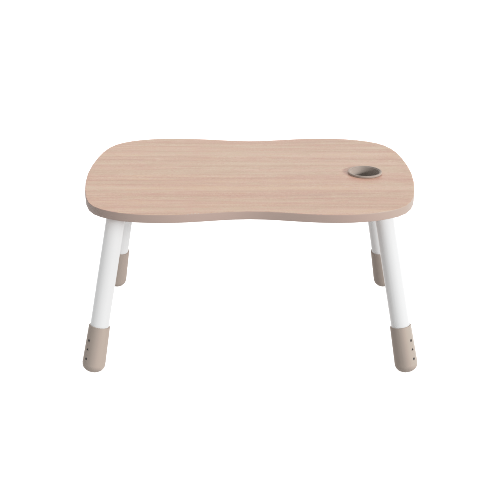

10순위 추천 아이템 : 뚜뚜 높이조절 아이책상 DIY (화이트오크)
------------------------------------------------------------


top_style                projectId  \
0      MODERN  X8j99sp49E05B453ACF48AD   
143    MODERN  X87j65GEE43274EC53B461C   
969    MODERN  X8z7-RX227A91103F864452   
963    MODERN  X8z7-RX227A91103F864452   
965    MODERN  X8z7-RX227A91103F864452   
966    MODERN  X8z7-RX227A91103F864452   
967    MODERN  X8z7-RX227A91103F864452   
968    MODERN  X8z7-RX227A91103F864452   
971    MODERN  X8z7-RX227A91103F864452   
972    MODERN  X8z7-RX227A91103F864452   

                                                  name  use_count  \
0                        자동습도조절 스마트 초음파 가습기 EK-H3C40WH          1   
143              미렌트 확장형 스타일클린 워셔블 패브릭소파 2colors(아이보리)          3   
969                            샘키즈 낮은 책장 1305 (라이트메이플)          2   
963                   그레이스 아쿠아텍스 소파 전용 보조스툴 단품 (다크그레이)          1   
965                         샘키즈 스칸디 에디션 전면책장 870 (화이트)          1   
966  65인치 4K UHD 사이니지 TV 본체형 / 벽걸이형 LH65QBREBGCXKR ...          1   
967                              이지두잉 유아 자석보드 칠판 (그레이)          1   
968                                스마일플라워 양면쿠션 주방매트(M)          1   
971              샘키즈 낮은 수납장 1305 뉴트럴베이지 (라이트메이플-하프베이지)          1   
972                           뚜뚜 높이조절 아이책상 DIY (화이트오크)          1   

     awesome_score                                               tags  \
0         0.996600           [계절가전, 가습기, 가습, 화이트, 흰색, 초음파식, 초음파, EMK]   
143       0.985641  [소파, 쇼파, 4인용/다인용소파, 4인소파, 4인쇼파, 4인, 4인용, 4인용소파...   
969       0.976376  [유아동수납, 유아, 키즈, 아기, 아동, 유아동수납장, 수납, 수납함, 수납장, ...   
963       0.976376   [스툴, 소파스툴, 발받침, 발받침대, 오토만, 그레이, 회색, 방수패브릭, 채움가구]   
965       0.976376                                               [한샘]   
966       0.976376                                             [삼성전자]   
967       0.976376  [유아동놀이가구, 유아, 키즈, 아기, 아동, 장난감, 놀이, TON, 이지두잉, ...   
968       0.976376                                              [데코뷰]   
971       0.976376  [유아동수납, 유아, 키즈, 아기, 아동, 유아동수납장, 수납, 수납함, 수납장, ...   
972       0.976376                                              [리바트]   

                                                images  \
0    [https://resources.archisketch.com/product/XXQ...   
143  [https://resources.archisketch.com/product/XvJ...   
969  [https://resources.archisketch.com/product/XpB...   
963  [https://resources.archisketch.com/product/Xrh...   
965  [https://resources.archisketch.com/product/XvJ...   
966  [https://resources.archisketch.com/product/Xz-...   
967  [https://resources.archisketch.com/product/XkM...   
968  [https://resources.archisketch.com/product/X1-...   
971  [https://resources.archisketch.com/product/XpB...   
972  [https://resources.archisketch.com/product/XvJ...   

                  product_id  
0    XXQODtk64AA2BC4BBE54FE6  
143  XvJwdJL781CC2917C314D10  
969  XpB5qBjBD5B35E1688C462F  
963  XrhzTmH4AD4F2B924ED48F7  
965  XvJtJVxA1BAC57ACE364A2E  
966  Xz-wAFED496F743543646FF  
967  XkM8W_Q067B75FEBFEE437C  
968  X1-TGzM3BB93C900A8A4865  
971  XpB5qA-9CA0D3E340874D56  
972  XvJtJXQ02F35598FE6D4447

In [170]:
find_sim_item(products_df_b, style_sim_sorted_ind_b, '마카롱 패브릭 1인용소파 5colors (아이보리)', 10)

### '421B6D0E746C4E6D' 에 대한 추천 테스트

In [171]:
products_df_4['name'].tolist()[:10]

['내츄럴 라벤더 부쉬 조화 (라벤더)',
 '아이즐렛 다이닝 테이블',
 '클램',
 '블루 풀 레이스 티팟 1000ml',
 '블루 플레인 2단 스탠드',
 '차이나체어',
 '블루 플레인 컵앤소서 180ml',
 '몰딩_01',
 '거베라 조화_2color (피치핑크)',
 '진심디자인 뮤트럴 모던 스톤 오브제 미니 조각상 인테리어 소품 촬영 장식_A']

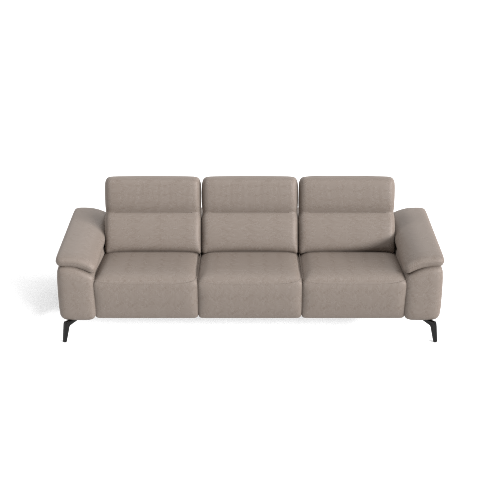

[몰리세 4인 패브릭 리클라이너 3colors (샌드베이지)]에 대한 Top10 추천 결과


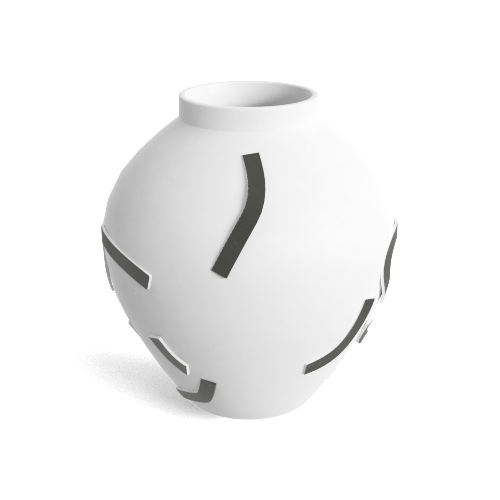

1순위 추천 아이템 : 핸드 페인트 화병
------------------------------------------------------------


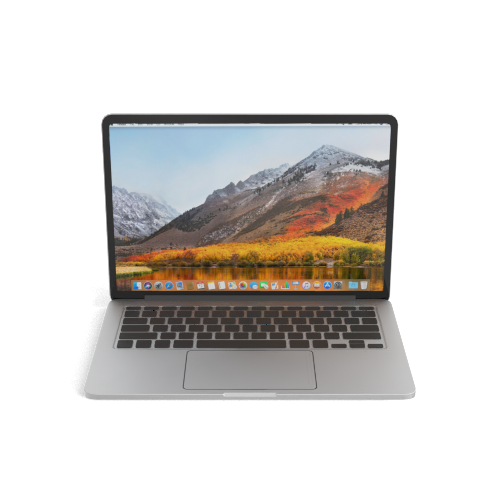

2순위 추천 아이템 : 맥북프로 13형
------------------------------------------------------------
이미지가 없습니다!
3순위 추천 아이템 : 케이프체어
------------------------------------------------------------


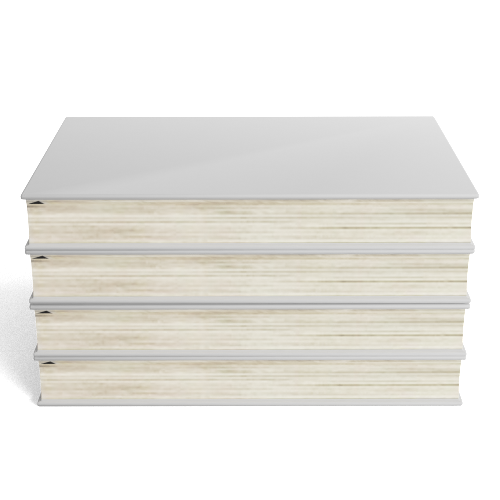

4순위 추천 아이템 : Books1
------------------------------------------------------------


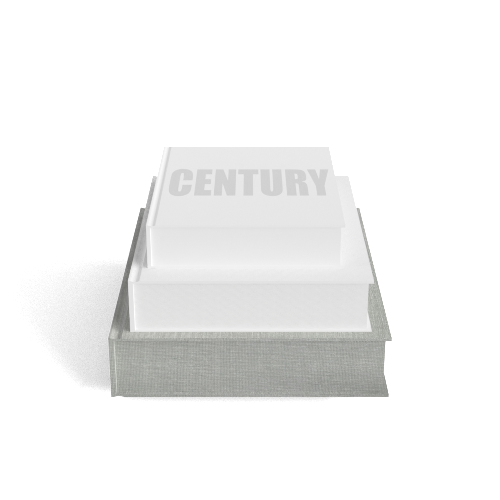

5순위 추천 아이템 : books1
------------------------------------------------------------


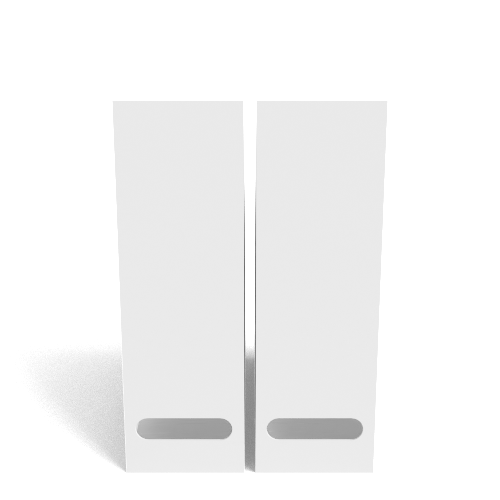

6순위 추천 아이템 : IKEA+KVISSLE+Magazine+file+set+of+2
------------------------------------------------------------


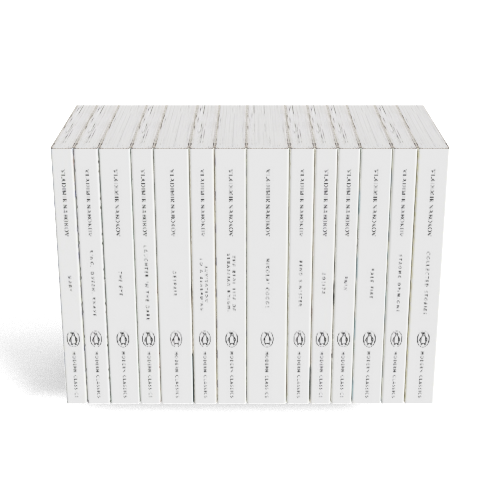

7순위 추천 아이템 : books2
------------------------------------------------------------


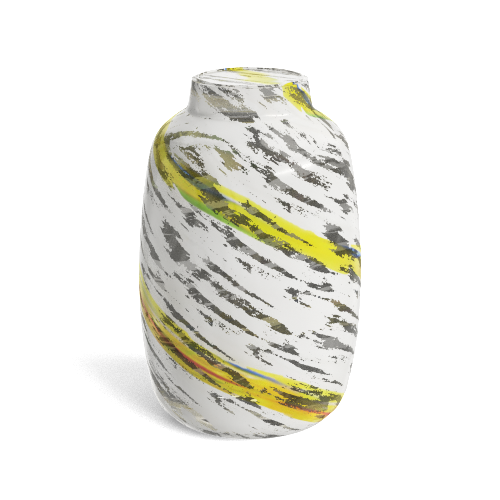

8순위 추천 아이템 : Splash Vase Round M
------------------------------------------------------------


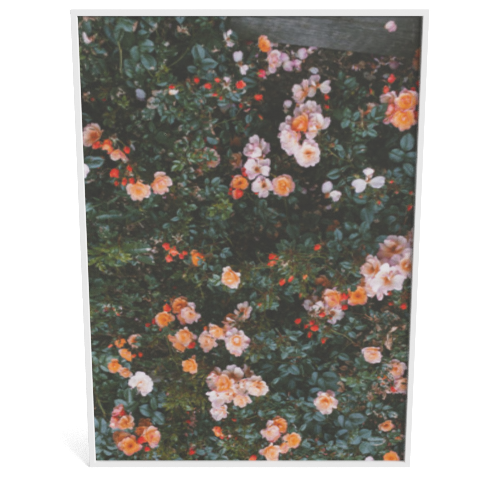

9순위 추천 아이템 : rose 포스터
------------------------------------------------------------


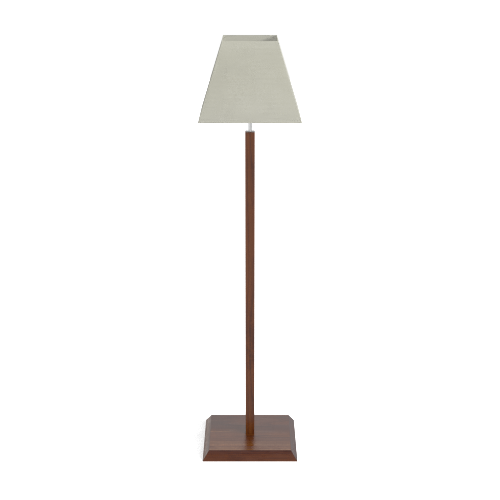

10순위 추천 아이템 : 캐슬 장스탠드 (브라운)
------------------------------------------------------------


top_style                projectId                                 name  \
63     MODERN  X8setNf6A59EEE7DE5F4939                            핸드 페인트 화병   
64     MODERN  X8setNf6A59EEE7DE5F4939                             맥북프로 13형   
65     MODERN  X8setNf6A59EEE7DE5F4939                                케이프체어   
66     MODERN  X8setNf6A59EEE7DE5F4939                               Books1   
67     MODERN  X8setNf6A59EEE7DE5F4939                               books1   
68     MODERN  X8setNf6A59EEE7DE5F4939  IKEA+KVISSLE+Magazine+file+set+of+2   
69     MODERN  X8setNf6A59EEE7DE5F4939                               books2   
70     MODERN  X8setNf6A59EEE7DE5F4939                  Splash Vase Round M   
123   NATURAL  X8hTk8vA40CE650486343FE                             rose 포스터   
120   NATURAL  X8hTk8vA40CE650486343FE                        캐슬 장스탠드 (브라운)   

     use_count  awesome_score  \
63           1       0.993620   
64           1       0.993620   
65           1       0.993620   
66           1       0.993620   
67           1       0.993620   
68           1       0.993620   
69           1       0.993620   
70           1       0.993620   
123          3       0.985887   
120          1       0.985887   

                                                  tags  \
63                  [h&m, 에이치엔엠, 화병, 꽃병, 항아리, 화이트, 블랙]   
64               [애플, Apple, 맥북, 노트북, 사무용, 사뭉제품, 가전제품]   
65        [키코디자인, kikodesign, 의자, 체어, 등받이의자, 원목, 원목의자]   
66                                                  []   
67                                                  []   
68              [이케아, IKEA, 파일꽂이, 수납함, 책정리, 책보관, 서류보관]   
69                                                  []   
70                                  [헤이, hay, 수공예, 꽃병]   
123                                                 []   
120  [조명, 장스탠드, 긴스탠드, 브라운, 갈색, 일반형, 우드, 나무, 원목, 브라운...   

                                                images  \
63   [https://resources.archisketch.com/product/Xjt...   
64   [https://resources.archisketch.com/product/XSW...   
65                                                  []   
66   [https://resources.archisketch.com/product/XRX...   
67   [https://resources.archisketch.com/product/XRM...   
68   [https://resources.archisketch.com/product/XSQ...   
69   [https://resources.archisketch.com/product/XRX...   
70   [https://resources.archisketch.com/product/Xhs...   
123  [https://resources.archisketch.com/product/Xkc...   
120  [https://resources.archisketch.com/product/XQF...   

                  product_id  
63   Xjt2iniD42CE68ECCF644F6  
64   XSWNaDQ8D34AB5317CA4971  
65   XjzNZeI16D710DE0FBA43A3  
66   XRXUSphE074D2153FDC46EA  
67   XRMaQ0Z45C428C0EBAC4E57  
68   XSQZqqe91BEC8D18CDC4889  
69   XRXEo5f45ED8B76A10B4572  
70   XhsyhiIF86DF47B371E43DF  
123  XkcxwqU359312F22A0D44FB  
120  XQF8kQu091CDE8381BE4CF0

In [172]:
find_sim_item(products_df_4, style_sim_sorted_ind_4, '몰리세 4인 패브릭 리클라이너 3colors (샌드베이지)', 10)